<h1>Linear Regression Multiple Outputs</h1> 


<h2>Objective</h2><ul><li> How to create a complicated models using pytorch build in functions.</li></ul> 


<h2>Table of Contents</h2>
In this lab, you will create a model the Pytroch way. This will help you as models get more complicated.

<div>
<li><a href="#ref0">Make Some Data</a></li>
<li><a href="#ref1">Create the Model and Cost Function the Pytorch way</a></li>
<li><a href="#ref2">Train the Model: Batch Gradient Descent</a></li>
</div>

Import the following libraries:  


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

Set the random seed:


In [2]:
torch.manual_seed(1)

<a id="ref0"></a>
<h2 align=center>Make Some Data </h2>
Create a dataset class with two-dimensional features and two targets: 


In [3]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:,0] = torch.arange(-1,1, 0.1)
        self.x[:,1] = torch.arange(-1,1, 0.1)
        self.w = torch.tensor([ [1.0, -1.0], [1.0, 3.0]])
        self.b = torch.tensor([[1.0,-1.0]])
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.001 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

create a dataset object 


In [4]:
data_set = Data()

<a id="ref1"></a>
<h2 align=center>Create the Model, Optimizer, and Total Loss Function (cost)</h2>


Create a custom module:


In [7]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)


Create an optimizer object and set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  


In [8]:
model = LinearRegression(2,2)

Create an optimizer object and set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  


<img src="https://ibm.box.com/shared/static/f8hskuwrnctjg21agud69ddla0jkbef5.png" width="100," align="center">


In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

Create the criterion function that calculates the total loss or cost:


In [10]:
criterion = nn.MSELoss()

Create a data loader object and set the batch_size to 5:


In [11]:
train_loader = DataLoader(dataset=data_set, batch_size=5)

<a id="ref2"></a>
<h2 align=center>Train the Model via Mini-Batch Gradient Descent </h2>


Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost.


In [12]:
LOSS = []
epochs = 100
   
for epoch in range(epochs):
    for x, y in train_loader:
        yhat = model(x)
        loss = criterion(yhat, y)
        LOSS.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Plot the cost:


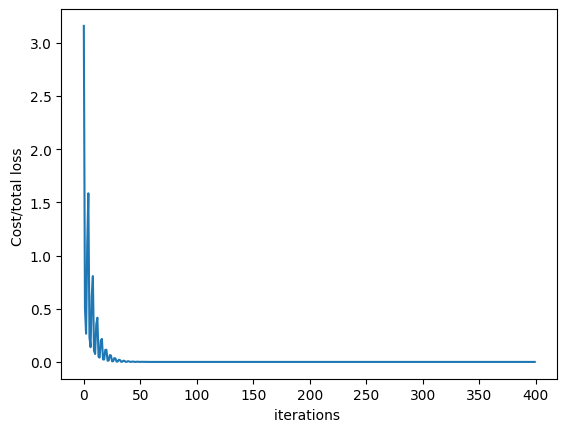

In [13]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()